In [1]:
import os
from pathlib import Path
import pandas as pd

In [2]:
pasta_vendas = './vendas'
conteudo = os.listdir(pasta_vendas)
display(conteudo)

['Devolucoes - Belo Horizonte.csv',
 'Devolucoes - Curitiba.csv',
 'Devolucoes - Fortaleza.csv',
 'Devolucoes - Goiás.csv',
 'Devolucoes - Porto Alegre.csv',
 'Devolucoes - Recife.csv',
 'Devolucoes - Rio de Janeiro.csv',
 'Devolucoes - Salvador.csv',
 'Devolucoes - São Paulo.csv',
 'Vendas - Belo Horizonte.csv',
 'Vendas - Curitiba.csv',
 'Vendas - Fortaleza.csv',
 'Vendas - Goiás.csv',
 'Vendas - Porto Alegre.csv',
 'Vendas - Recife.csv',
 'Vendas - Rio de Janeiro.csv',
 'Vendas - Salvador.csv',
 'Vendas - São Paulo.csv']

In [3]:
tabela_total = pd.DataFrame()

for arquivo in os.listdir(pasta_vendas):
    caminho_arquivo = os.path.join(pasta_vendas, arquivo)
    if os.path.isfile(caminho_arquivo) and arquivo.startswith('Vendas'):
        tabela = pd.read_csv(caminho_arquivo)
        tabela_total = pd.concat([tabela_total,tabela])

display(tabela_total)
    

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,João,Junior,4/14/2018,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2018,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2018,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2018,São Paulo,1400,NaN


In [4]:
tabela_produtos = tabela_total.groupby('Produto').sum()
tabela_produtos = tabela_produtos[["Quantidade Vendida"]].sort_values(by="Quantidade Vendida", ascending=False)
display(tabela_produtos)

,Quantidade Vendida
Produto,
iPhone,8974
Televisão,5931
Notebook,3249
Android,3183
SmartWatch,2980
Tablet,2921
Câmera,2805


In [5]:
tabela_total["Faturamento"] = tabela_total["Quantidade Vendida"] * tabela_total["Preco Unitario"]

tabela_faturamento = tabela_total.groupby("Produto").sum()
tabela_faturamento = tabela_faturamento[["Faturamento"]].sort_values(by="Faturamento", ascending=False)
display(tabela_faturamento)

,Faturamento
Produto,
iPhone,47562200
Televisão,14827500
Notebook,11371500
Android,10822200
Câmera,5890500
Tablet,4673600
SmartWatch,4172000


In [6]:
tabela_lojas = tabela_total.groupby('Loja').sum()
tabela_lojas = tabela_lojas[["Faturamento"]].sort_values(by="Faturamento", ascending=False)
display(tabela_lojas)

,Faturamento
Loja,
São Paulo,22098300
Rio de Janeiro,14867800
Fortaleza,14087900
Salvador,13111300
Goiás,7441800
Recife,7303000
Curitiba,7060500
Porto Alegre,6868600
Belo Horizonte,6480300


In [7]:
import plotly.express as px

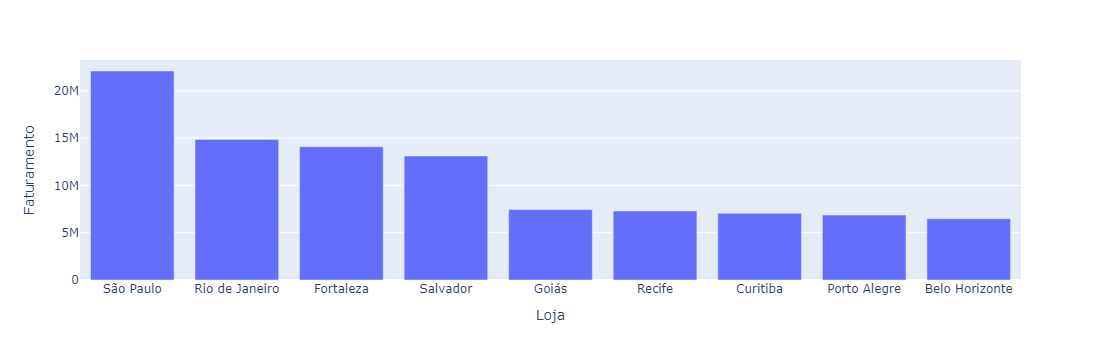

In [18]:
grafico = px.bar(tabela_lojas, x=tabela_lojas.index, y="Faturamento")
grafico.show()